In [1]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import normalize,StandardScaler
from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve
import seaborn as sns
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
Dataset = pd.read_csv("Dataset_Final.csv")

In [3]:
Dataset.isnull().sum()

Unnamed: 0                        0
Hospital_Name                     0
Age                               0
BMI                               0
LOS                               0
Average_Daily_Use_Cigarettes      0
Hookah_Consumption                0
SystolicBP                        0
DiastolicBP                       0
Respiratory_rate                  0
Oxygen_Saturation_Percent         0
Intubation_Duration_Day           0
ICU_LOS                           0
Total_Lung_Involvement_Percent    0
NIV_Duration_Day                  0
Total_Lung_Involvement_Rank       8
Sex                               0
Current_Smoking                   0
History_hookah                    0
Drug_history                      0
Sweating                          0
Fever                             0
Dyspnea                           0
Chestpain                         0
Abnormal_Lung_Signs               0
Diabetes                          0
Hypertension                      0
Cancers                     

In [4]:
Dataset.drop("Unnamed: 0", axis = 1 , inplace=True)
Dataset.drop("Hospital_Name", axis = 1 , inplace=True)
Dataset.drop("Total_Lung_Involvement_Rank", axis = 1 , inplace=True)
Dataset.drop("Hookah_Consumption", axis = 1 , inplace=True)
Dataset.drop("LOS", axis = 1 , inplace=True)
Dataset.drop("ICU_LOS", axis = 1 , inplace=True)
Dataset.head()

,Age,BMI,Average_Daily_Use_Cigarettes,SystolicBP,DiastolicBP,Respiratory_rate,Oxygen_Saturation_Percent,Intubation_Duration_Day,Total_Lung_Involvement_Percent,NIV_Duration_Day,...,Cancers,Cardiovascular_Disease,CKD,COPD,Immunosuppressant_Drugs,Antihypertensive_drug,Pantoprazole,Hospitalization_14_days_ago,ICU_admission,Death
0,61.0,20.500000,0.0,122.422697,78.0,19.718638,91.0,0,0.0,0,...,0,0,0,0,0,1,0,0.0,1.0,1
1,74.0,26.700000,0.0,40.000000,75.0,16.000000,75.0,0,0.0,0,...,0,1,1,0,0,0,1,1.0,1.0,1
2,51.0,29.100000,0.0,122.422697,78.0,19.718638,91.0,0,0.0,0,...,0,0,0,0,0,0,0,1.0,1.0,1
3,64.0,41.000000,0.0,136.000000,78.0,20.000000,95.0,0,0.0,0,...,0,0,0,0,0,0,0,0.0,1.0,0
4,20.0,26.148507,0.0,113.000000,76.0,19.000000,92.0,0,0.0,0,...,0,0,0,0,0,0,0,0.0,2.0,1


In [5]:
#Controlling Outlier data
data_mean, data_std = np.mean(Dataset['Age']), np.std(Dataset['Age'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Age'] if x < lower or x > upper]
print('Age Column Identified outliers: %d' % len(outliers))
#############################################################################################
data_mean, data_std = np.mean(Dataset['BMI']), np.std(Dataset['BMI'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['BMI'] if x < lower or x > upper]
print('BMI Column Identified outliers: %d' % len(outliers))


for i in range(len(Dataset['BMI'])):
    if Dataset['BMI'][i] < lower:
        Dataset['BMI'][i] = lower
        
        
for i in range(len(Dataset['BMI'])):
    if Dataset['BMI'][i] > upper:
        Dataset['BMI'][i] = upper
        

outliers = [x for x in Dataset['BMI'] if x < lower or x > upper]
print('BMI Column Identified outliers: %d' % len(outliers))
#############################################################################################
data_mean, data_std = np.mean(Dataset['Average_Daily_Use_Cigarettes']), np.std(Dataset['Average_Daily_Use_Cigarettes'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Average_Daily_Use_Cigarettes'] if x < lower or x > upper]
print('Average_Daily_Use_Cigarettes Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['Average_Daily_Use_Cigarettes'])):
    if Dataset['Average_Daily_Use_Cigarettes'][i] < lower:
        Dataset['Average_Daily_Use_Cigarettes'][i] = lower
        
        
for i in range(len(Dataset['Average_Daily_Use_Cigarettes'])):
    if Dataset['Average_Daily_Use_Cigarettes'][i] > upper:
        Dataset['Average_Daily_Use_Cigarettes'][i] = upper
        

outliers = [x for x in Dataset['Average_Daily_Use_Cigarettes'] if x < lower or x > upper]
print('Average_Daily_Use_Cigarettes Column Identified outliers: %d' % len(outliers))
#############################################################################################
data_mean, data_std = np.mean(Dataset['SystolicBP']), np.std(Dataset['SystolicBP'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['SystolicBP'] if x < lower or x > upper]
print('SystolicBP Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['SystolicBP'])):
    if Dataset['SystolicBP'][i] < lower:
        Dataset['SystolicBP'][i] = lower
        
        
for i in range(len(Dataset['SystolicBP'])):
    if Dataset['SystolicBP'][i] > upper:
        Dataset['SystolicBP'][i] = upper
        

outliers = [x for x in Dataset['SystolicBP'] if x < lower or x > upper]
print('SystolicBP Column Identified outliers: %d' % len(outliers))
#############################################################################################
data_mean, data_std = np.mean(Dataset['DiastolicBP']), np.std(Dataset['DiastolicBP'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['DiastolicBP'] if x < lower or x > upper]
print('DiastolicBP Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['DiastolicBP'])):
    if Dataset['DiastolicBP'][i] < lower:
        Dataset['DiastolicBP'][i] = lower
       

for i in range(len(Dataset['DiastolicBP'])):
    if Dataset['DiastolicBP'][i] > upper:
        Dataset['DiastolicBP'][i] = upper
    

outliers = [x for x in Dataset['DiastolicBP'] if x < lower or x > upper]
print('DiastolicBP Column Identified outliers: %d' % len(outliers))
#############################################################################################
data_mean, data_std = np.mean(Dataset['Respiratory_rate']), np.std(Dataset['Respiratory_rate'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Respiratory_rate'] if x < lower or x > upper]
print('Respiratory_rate Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['Respiratory_rate'])):
    if Dataset['Respiratory_rate'][i] < lower:
        Dataset['Respiratory_rate'][i] = lower
 
        
for i in range(len(Dataset['Respiratory_rate'])):
    if Dataset['Respiratory_rate'][i] > upper:
        Dataset['Respiratory_rate'][i] = upper
   

outliers = [x for x in Dataset['Respiratory_rate'] if x < lower or x > upper]
print('Respiratory_rate Column Identified outliers: %d' % len(outliers))
#############################################################################################
data_mean, data_std = np.mean(Dataset['Oxygen_Saturation_Percent']), np.std(Dataset['Oxygen_Saturation_Percent'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Oxygen_Saturation_Percent'] if x < lower or x > upper]
print('Oxygen_Saturation_Percent Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['Oxygen_Saturation_Percent'])):
    if Dataset['Oxygen_Saturation_Percent'][i] < lower:
        Dataset['Oxygen_Saturation_Percent'][i] = lower

        
for i in range(len(Dataset['Oxygen_Saturation_Percent'])):
    if Dataset['Oxygen_Saturation_Percent'][i] > upper:
        Dataset['Oxygen_Saturation_Percent'][i] = upper


outliers = [x for x in Dataset['Oxygen_Saturation_Percent'] if x < lower or x > upper]
print('Oxygen_Saturation_Percent Column Identified outliers: %d' % len(outliers))
#############################################################################################
data_mean, data_std = np.mean(Dataset['Intubation_Duration_Day']), np.std(Dataset['Intubation_Duration_Day'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Intubation_Duration_Day'] if x < lower or x > upper]
print('Intubation_Duration_Day Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['Intubation_Duration_Day'])):
    if Dataset['Intubation_Duration_Day'][i] < lower:
        Dataset['Intubation_Duration_Day'][i] = lower

        
for i in range(len(Dataset['Intubation_Duration_Day'])):
    if Dataset['Intubation_Duration_Day'][i] > upper:
        Dataset['Intubation_Duration_Day'][i] = upper


outliers = [x for x in Dataset['Intubation_Duration_Day'] if x < lower or x > upper]
print('Intubation_Duration_Day Column Identified outliers: %d' % len(outliers))
#############################################################################################
data_mean, data_std = np.mean(Dataset['Total_Lung_Involvement_Percent']), np.std(Dataset['Total_Lung_Involvement_Percent'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Total_Lung_Involvement_Percent'] if x < lower or x > upper]
print('Total_Lung_Involvement_Percent Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['Total_Lung_Involvement_Percent'])):
    if Dataset['Total_Lung_Involvement_Percent'][i] < lower:
        Dataset['Total_Lung_Involvement_Percent'][i] = lower

        
for i in range(len(Dataset['Total_Lung_Involvement_Percent'])):
    if Dataset['Total_Lung_Involvement_Percent'][i] > upper:
        Dataset['Total_Lung_Involvement_Percent'][i] = upper


outliers = [x for x in Dataset['Total_Lung_Involvement_Percent'] if x < lower or x > upper]
print('Total_Lung_Involvement_Percent Column Identified outliers: %d' % len(outliers))
#############################################################################################
data_mean, data_std = np.mean(Dataset['NIV_Duration_Day']), np.std(Dataset['NIV_Duration_Day'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['NIV_Duration_Day'] if x < lower or x > upper]
print('NIV_Duration_Day Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['NIV_Duration_Day'])):
    if Dataset['NIV_Duration_Day'][i] < lower:
        Dataset['NIV_Duration_Day'][i] = lower

        
for i in range(len(Dataset['NIV_Duration_Day'])):
    if Dataset['NIV_Duration_Day'][i] > upper:
        Dataset['NIV_Duration_Day'][i] = upper


outliers = [x for x in Dataset['NIV_Duration_Day'] if x < lower or x > upper]
print('NIV_Duration_Day Column Identified outliers: %d' % len(outliers))

Age Column Identified outliers: 0
BMI Column Identified outliers: 8
BMI Column Identified outliers: 0
Average_Daily_Use_Cigarettes Column Identified outliers: 8
Average_Daily_Use_Cigarettes Column Identified outliers: 0
SystolicBP Column Identified outliers: 9
SystolicBP Column Identified outliers: 0
DiastolicBP Column Identified outliers: 9
DiastolicBP Column Identified outliers: 0
Respiratory_rate Column Identified outliers: 6
Respiratory_rate Column Identified outliers: 0
Oxygen_Saturation_Percent Column Identified outliers: 14
Oxygen_Saturation_Percent Column Identified outliers: 0
Intubation_Duration_Day Column Identified outliers: 13
Intubation_Duration_Day Column Identified outliers: 0
Total_Lung_Involvement_Percent Column Identified outliers: 30
Total_Lung_Involvement_Percent Column Identified outliers: 0
NIV_Duration_Day Column Identified outliers: 11
NIV_Duration_Day Column Identified outliers: 0


C:\Users\alish\AppData\Local\Temp\ipykernel_9316\1012456011.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset['BMI'][i] = upper
C:\Users\alish\AppData\Local\Temp\ipykernel_9316\1012456011.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset['Average_Daily_Use_Cigarettes'][i] = upper
C:\Users\alish\AppData\Local\Temp\ipykernel_9316\1012456011.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset['SystolicBP'][i

In [6]:
X = Dataset[Dataset.columns.difference(["Death"])] 
Y = Dataset["Death"]

In [7]:
sm = SMOTE(random_state=42)
X_balanced, Y_balanced = sm.fit_resample(X, Y)

In [8]:
X_balanced[['Age', 'BMI','Average_Daily_Use_Cigarettes',
       'SystolicBP', 'DiastolicBP', 'Respiratory_rate',
       'Oxygen_Saturation_Percent', 'Intubation_Duration_Day', 'Total_Lung_Involvement_Percent'
       ,'NIV_Duration_Day']] = normalize(X_balanced[['Age', 'BMI', 'Average_Daily_Use_Cigarettes',
       'SystolicBP', 'DiastolicBP', 'Respiratory_rate',
       'Oxygen_Saturation_Percent', 'Intubation_Duration_Day', 'Total_Lung_Involvement_Percent'
       ,'NIV_Duration_Day']])
X_balanced.head()

,Abnormal_Lung_Signs,Age,Antihypertensive_drug,Average_Daily_Use_Cigarettes,BMI,CKD,COPD,Cancers,Cardiovascular_Disease,Chestpain,...,Immunosuppressant_Drugs,Intubation_Duration_Day,NIV_Duration_Day,Oxygen_Saturation_Percent,Pantoprazole,Respiratory_rate,Sex,Sweating,SystolicBP,Total_Lung_Involvement_Percent
0,0,0.331393,1,0.0,0.111370,0,0,0,0,0,...,0,0.0,0.0,0.494373,0,0.107125,1.0,0,0.665082,0.0
1,0,0.504618,0,0.0,0.182071,1,0,0,1,0,...,0,0.0,0.0,0.511437,1,0.109106,1.0,0,0.420918,0.0
2,0,0.279945,0,0.0,0.159734,0,0,0,0,0,...,0,0.0,0.0,0.499511,0,0.108238,1.0,0,0.671994,0.0
3,0,0.322031,0,0.0,0.187998,0,0,0,0,0,...,0,0.0,0.0,0.478015,0,0.100635,1.0,0,0.684317,0.0
4,0,0.118566,0,0.0,0.155016,0,0,0,0,0,...,0,0.0,0.0,0.545404,0,0.112638,1.0,0,0.669898,0.0


In [9]:
def display_results(results):
    print(f'Best parameters are: {results.best_params_}')
    print(f'Best Score is : {results.best_score_} ')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')
        
def showResults(model, modelType , X, Y):
    scores_accuracy = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
    scores_log_loss = cross_val_score(model, X, Y, cv=10, scoring='neg_log_loss')
    scores_briar = cross_val_score(model, X, Y, cv=10, scoring='neg_brier_score')
    scores_auc = cross_val_score(model, X, Y, cv=10, scoring='roc_auc')
    scores_recall = cross_val_score(model, X, Y, cv=10, scoring='recall')
    scores_precision = cross_val_score(model, X, Y, cv=10, scoring='precision')
    scores_f1 = cross_val_score(model, X, Y, cv=10, scoring='f1')
    print('K-fold cross-validation results:')
    print(modelType ," average accuracy is %2.3f" % scores_accuracy.mean())
    print(modelType ," average log_loss is %2.3f" % -scores_log_loss.mean())
    print(modelType ," average brier score is %2.3f" % -scores_briar.mean())
    print(modelType ," average auc is %2.3f" % scores_auc.mean())
    print(modelType ," average recall is %2.3f" % scores_recall.mean())
    print(modelType ," average precision is %2.3f" % scores_precision.mean())
    print(modelType ," average f1 is %2.3f" % scores_f1.mean())
    
params_randomf = {
    "max_depth" : [2,4,8,16,32,None],
    'n_estimators': range(100,1000,200),
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
}

params_DecisionT = {
    "max_depth" : [2,4,8,16,32,None],
    "criterion" : ['gini', 'entropy'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12]
}

params_Knn = {
    'n_neighbors':[6,8,10,12,14,16,18,20],
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

In [24]:
#Statistical Input
X = X_balanced[["Age", "Oxygen_Saturation_Percent", "Sweating", "Abnormal_Lung_Signs", "CKD",
             "Hospitalization_14_days_ago", "BMI", "Sex", "Current_Smoking", "Fever", "Chestpain",
               "Hypertension", "Cancers", "Cardiovascular_Disease", "Immunosuppressant_Drugs", 
                "Antihypertensive_drug", "Pantoprazole"]]
Y = Y_balanced

In [11]:
rf = RandomForestClassifier(random_state=5)

cv = GridSearchCV(rf,params_randomf,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=5),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': range(100, 1000, 200)},
             verbose=1)

In [12]:
display_results(cv)

Best parameters are: {'max_depth': 16, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 700}
Best Score is : 0.8287121984369691 


0.767 + or -0.05 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
0.76 + or -0.053 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}
0.761 + or -0.048 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 500}
0.763 + or -0.053 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 700}
0.763 + or -0.06 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 900}
0.767 + or -0.05 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.76 + or -0.053 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 300}
0.761 + or -0.048 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_sp

In [25]:
rf = RandomForestClassifier(random_state=5, 
                            max_depth = 16, 
                            min_samples_leaf = 3, 
                            min_samples_split = 8, 
                            n_estimators = 700)
rf.fit(X,Y)

showResults(rf, "Random Forest", X, Y)

K-fold cross-validation results:
Random Forest  average accuracy is 0.829
Random Forest  average log_loss is 0.402
Random Forest  average brier score is 0.126
Random Forest  average auc is 0.902
Random Forest  average recall is 0.820
Random Forest  average precision is 0.826
Random Forest  average f1 is 0.819


In [13]:
dt = DecisionTreeClassifier(random_state=5)

cv = GridSearchCV(dt,params_DecisionT,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8, 16, 32, None],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12]},
             verbose=1)

In [14]:
display_results(cv)

Best parameters are: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 10}
Best Score is : 0.7844631328576283 


0.735 + or -0.044 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8}
0.735 + or -0.044 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.735 + or -0.044 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 12}
0.735 + or -0.044 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 8}
0.735 + or -0.044 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 10}
0.735 + or -0.044 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 12}
0.735 + or -0.044 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 8}
0.735 + or -0.044 for the {'criterion': 'gini', 'max_depth': 2, 'min_sa

In [26]:
dt = DecisionTreeClassifier(random_state=5, 
                            criterion = 'entropy',
                            max_depth = 8,
                            min_samples_leaf = 3, 
                            min_samples_split = 12)
dt.fit(X,Y)

showResults(dt, "Decision Tree", X, Y)

K-fold cross-validation results:
Decision Tree  average accuracy is 0.784
Decision Tree  average log_loss is 1.805
Decision Tree  average brier score is 0.158
Decision Tree  average auc is 0.851
Decision Tree  average recall is 0.767
Decision Tree  average precision is 0.789
Decision Tree  average f1 is 0.771


In [15]:
knn = KNeighborsClassifier()

cv = GridSearchCV(knn,params_Knn,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [6, 8, 10, 12, 14, 16, 18, 20],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [16]:
display_results(cv)

Best parameters are: {'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}
Best Score is : 0.7502973156642881 


0.708 + or -0.071 for the {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
0.737 + or -0.095 for the {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}
0.705 + or -0.089 for the {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'uniform'}
0.735 + or -0.087 for the {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}
0.686 + or -0.09 for the {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
0.732 + or -0.094 for the {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
0.685 + or -0.085 for the {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'uniform'}
0.725 + or -0.101 for the {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'distance'}
0.687 + or -0.083 for the {'metric': 'euclidean', 'n_neighbors': 14, 'weights': 'uniform'}
0.726 + or -0.091 for the {'metric': 'euclidean', 'n_neigh

In [27]:
knn = KNeighborsClassifier(metric = 'manhattan',
                            n_neighbors = 8,
                            weights = 'distance')
knn.fit(X,Y)

showResults(knn, "KNN", X, Y)

K-fold cross-validation results:
KNN  average accuracy is 0.750
KNN  average log_loss is 0.765
KNN  average brier score is 0.178
KNN  average auc is 0.809
KNN  average recall is 0.778
KNN  average precision is 0.732
KNN  average f1 is 0.752


In [28]:
#Statistical Input With Post admission variables
X = X_balanced[["Age", "Oxygen_Saturation_Percent", "Sweating", "Abnormal_Lung_Signs", "CKD",
             "Hospitalization_14_days_ago", "BMI", "Sex", "Current_Smoking", "Fever", "Chestpain",
               "Hypertension", "Cancers", "Cardiovascular_Disease", "Immunosuppressant_Drugs", 
                "Antihypertensive_drug", "Pantoprazole",'Intubation_Duration_Day','NIV_Duration_Day',
               "ICU_admission"]]
Y = Y_balanced

In [18]:
rf = RandomForestClassifier(random_state=5)

cv = GridSearchCV(rf,params_randomf,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=5),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': range(100, 1000, 200)},
             verbose=1)

In [19]:
display_results(cv)

Best parameters are: {'max_depth': 16, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 300}
Best Score is : 0.8860091743119266 


0.836 + or -0.113 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
0.833 + or -0.118 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}
0.835 + or -0.117 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 500}
0.836 + or -0.116 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 700}
0.836 + or -0.118 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 900}
0.836 + or -0.113 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.833 + or -0.118 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 300}
0.835 + or -0.117 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samp

In [29]:
rf = RandomForestClassifier(random_state=5, 
                            max_depth = 16, 
                            min_samples_leaf = 3, 
                            min_samples_split = 10, 
                            n_estimators = 300)
rf.fit(X,Y)

showResults(rf, "Random Forest", X, Y)

K-fold cross-validation results:
Random Forest  average accuracy is 0.886
Random Forest  average log_loss is 0.320
Random Forest  average brier score is 0.095
Random Forest  average auc is 0.926
Random Forest  average recall is 0.866
Random Forest  average precision is 0.900
Random Forest  average f1 is 0.880


In [20]:
dt = DecisionTreeClassifier(random_state=5)

cv = GridSearchCV(dt,params_DecisionT,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8, 16, 32, None],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12]},
             verbose=1)

In [21]:
display_results(cv)

Best parameters are: {'criterion': 'gini', 'max_depth': 16, 'min_samples_leaf': 3, 'min_samples_split': 12}
Best Score is : 0.8573479442745497 


0.818 + or -0.112 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8}
0.818 + or -0.112 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.818 + or -0.112 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 12}
0.818 + or -0.112 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 8}
0.818 + or -0.112 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 10}
0.818 + or -0.112 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 12}
0.818 + or -0.112 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 8}
0.818 + or -0.112 for the {'criterion': 'gini', 'max_depth': 2, 'min_samp

In [30]:
dt = DecisionTreeClassifier(random_state=5, 
                            criterion = 'gini',
                            max_depth = 16,
                            min_samples_leaf = 3, 
                            min_samples_split = 12)
dt.fit(X,Y)

showResults(dt, "Decision Tree", X, Y)

K-fold cross-validation results:
Decision Tree  average accuracy is 0.857
Decision Tree  average log_loss is 2.835
Decision Tree  average brier score is 0.124
Decision Tree  average auc is 0.888
Decision Tree  average recall is 0.853
Decision Tree  average precision is 0.861
Decision Tree  average f1 is 0.854


C:\Users\alish\anaconda3\lib\site-packages\sklearn\calibration.py:964: FutureWarning: The normalize argument is deprecated in v1.1 and will be removed in v1.3. Explicitly normalizing y_prob will reproduce this behavior, but it is recommended that a proper probability is used (i.e. a classifier's `predict_proba` positive class or `decision_function` output calibrated with `CalibratedClassifierCV`).
  warnings.warn(


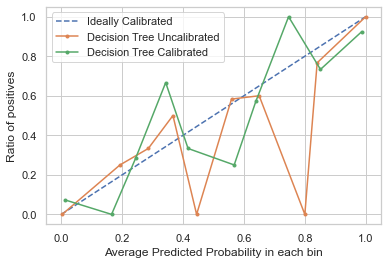

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.2, random_state=5)
calibrated = CalibratedClassifierCV(dt, method='sigmoid', cv=10)
calibrated.fit(xtrain, ytrain)
probs = calibrated.predict_proba(xtest)[:, 1]
uncalibrated = dt.predict_proba(xtest)[:,1]
fop_uncalibrated, mpv_uncalibrated = calibration_curve(ytest, uncalibrated, n_bins=10, normalize=True)
fop_calibrated, mpv_calibrated = calibration_curve(ytest, probs, n_bins=10, normalize=True)
plt.plot([0, 1], [0, 1], linestyle='--', label = 'Ideally Calibrated')
plt.plot(mpv_uncalibrated, fop_uncalibrated, marker='.', label = 'Decision Tree Uncalibrated')
plt.plot(mpv_calibrated, fop_calibrated, marker='.', label = 'Decision Tree Calibrated')
leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.show()

In [13]:
calibrated = CalibratedClassifierCV(dt, method='sigmoid', cv=10)
showResults(calibrated, "Decision Tree Cal", X, Y)

K-fold cross-validation results:
Decision Tree Cal  average accuracy is 0.850
Decision Tree Cal  average log_loss is 0.385
Decision Tree Cal  average brier score is 0.115
Decision Tree Cal  average auc is 0.910
Decision Tree Cal  average recall is 0.840
Decision Tree Cal  average precision is 0.855
Decision Tree Cal  average f1 is 0.846


In [22]:
knn = KNeighborsClassifier()

cv = GridSearchCV(knn,params_Knn,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [6, 8, 10, 12, 14, 16, 18, 20],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [23]:
display_results(cv)

Best parameters are: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
Best Score is : 0.8204213387699626 


0.769 + or -0.101 for the {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
0.798 + or -0.096 for the {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}
0.787 + or -0.094 for the {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'uniform'}
0.796 + or -0.09 for the {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}
0.777 + or -0.084 for the {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
0.805 + or -0.084 for the {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
0.763 + or -0.089 for the {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'uniform'}
0.795 + or -0.086 for the {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'distance'}
0.759 + or -0.088 for the {'metric': 'euclidean', 'n_neighbors': 14, 'weights': 'uniform'}
0.792 + or -0.082 for the {'metric': 'euclidean', 'n_neig

In [31]:
knn = KNeighborsClassifier(metric = 'manhattan',
                            n_neighbors = 10,
                            weights = 'distance')
knn.fit(X,Y)

showResults(knn, "KNN", X, Y)

K-fold cross-validation results:
KNN  average accuracy is 0.820
KNN  average log_loss is 1.111
KNN  average brier score is 0.143
KNN  average auc is 0.866
KNN  average recall is 0.831
KNN  average precision is 0.817
KNN  average f1 is 0.823


C:\Users\alish\anaconda3\lib\site-packages\sklearn\calibration.py:964: FutureWarning: The normalize argument is deprecated in v1.1 and will be removed in v1.3. Explicitly normalizing y_prob will reproduce this behavior, but it is recommended that a proper probability is used (i.e. a classifier's `predict_proba` positive class or `decision_function` output calibrated with `CalibratedClassifierCV`).
  warnings.warn(


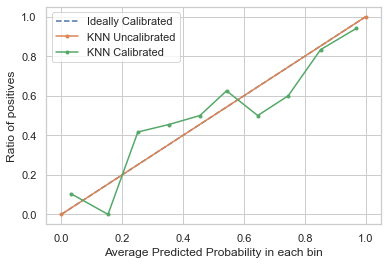

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.2, random_state=5)
calibrated = CalibratedClassifierCV(knn, method='sigmoid', cv=10)
calibrated.fit(xtrain, ytrain)
probs = calibrated.predict_proba(xtest)[:, 1]
uncalibrated = knn.predict_proba(xtest)[:,1]
fop_uncalibrated, mpv_uncalibrated = calibration_curve(ytest, uncalibrated, n_bins=10, normalize=True)
fop_calibrated, mpv_calibrated = calibration_curve(ytest, probs, n_bins=10, normalize=True)
plt.plot([0, 1], [0, 1], linestyle='--', label = 'Ideally Calibrated')
plt.plot(mpv_uncalibrated, fop_uncalibrated, marker='.', label = 'KNN Uncalibrated')
plt.plot(mpv_calibrated, fop_calibrated, marker='.', label = 'KNN Calibrated')
leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.show()

In [16]:
calibrated = CalibratedClassifierCV(knn, method='sigmoid', cv=10)
showResults(calibrated, "KNN Cal", X, Y)

K-fold cross-validation results:
KNN Cal  average accuracy is 0.849
KNN Cal  average log_loss is 0.389
KNN Cal  average brier score is 0.119
KNN Cal  average auc is 0.904
KNN Cal  average recall is 0.844
KNN Cal  average precision is 0.859
KNN Cal  average f1 is 0.848


In [19]:
#Feature Importance with extratreesclassifier Input
X = X_balanced[["Age" , "Oxygen_Saturation_Percent", "CKD","Respiratory_rate", "DiastolicBP", "SystolicBP",
                "BMI","Cancers","Average_Daily_Use_Cigarettes" ,"Fever", "Pantoprazole", "Abnormal_Lung_Signs",
                "Drug_history", "Current_Smoking", "Diabetes", "Cardiovascular_Disease" , "Dyspnea", "Hospitalization_14_days_ago",
                "Hypertension", "Antihypertensive_drug"]]
Y = Y_balanced

In [53]:
rf = RandomForestClassifier(random_state=5)

cv = GridSearchCV(rf,params_randomf,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=5),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': range(100, 1000, 200)},
             verbose=1)

In [54]:
display_results(cv)

Best parameters are: {'max_depth': 16, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 900}
Best Score is : 0.8489636425416242 


0.751 + or -0.06 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
0.753 + or -0.059 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}
0.757 + or -0.057 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 500}
0.758 + or -0.063 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 700}
0.757 + or -0.064 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 900}
0.751 + or -0.06 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.753 + or -0.059 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 300}
0.757 + or -0.057 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples

In [20]:
rf = RandomForestClassifier(random_state=5, 
                            max_depth = 16, 
                            min_samples_leaf = 3, 
                            min_samples_split = 8, 
                            n_estimators = 900)
rf.fit(X,Y)

showResults(rf, "Random Forest", X, Y)

K-fold cross-validation results:
Random Forest  average accuracy is 0.849
Random Forest  average log_loss is 0.405
Random Forest  average brier score is 0.123
Random Forest  average auc is 0.920
Random Forest  average recall is 0.851
Random Forest  average precision is 0.846
Random Forest  average f1 is 0.844


In [55]:
dt = DecisionTreeClassifier(random_state=5)

cv = GridSearchCV(dt,params_DecisionT,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8, 16, 32, None],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12]},
             verbose=1)

In [56]:
display_results(cv)

Best parameters are: {'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 3, 'min_samples_split': 10}
Best Score is : 0.79559123343527 


0.716 + or -0.032 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8}
0.716 + or -0.032 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.716 + or -0.032 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 12}
0.716 + or -0.032 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 8}
0.716 + or -0.032 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 10}
0.716 + or -0.032 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 12}
0.716 + or -0.032 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 8}
0.716 + or -0.032 for the {'criterion': 'gini', 'max_depth': 2, 'min_sam

In [21]:
dt = DecisionTreeClassifier(random_state=5, 
                            criterion = 'entropy',
                            max_depth = 16,
                            min_samples_leaf = 3, 
                            min_samples_split = 10)
dt.fit(X,Y)

showResults(dt, "Decision Tree", X, Y)

K-fold cross-validation results:
Decision Tree  average accuracy is 0.796
Decision Tree  average log_loss is 4.622
Decision Tree  average brier score is 0.179
Decision Tree  average auc is 0.832
Decision Tree  average recall is 0.780
Decision Tree  average precision is 0.798
Decision Tree  average f1 is 0.782


In [57]:
knn = KNeighborsClassifier()

cv = GridSearchCV(knn,params_Knn,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [6, 8, 10, 12, 14, 16, 18, 20],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [58]:
display_results(cv)

Best parameters are: {'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}
Best Score is : 0.7374277947672444 


0.686 + or -0.08 for the {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
0.72 + or -0.092 for the {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}
0.689 + or -0.086 for the {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'uniform'}
0.72 + or -0.097 for the {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}
0.695 + or -0.082 for the {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
0.718 + or -0.103 for the {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
0.678 + or -0.08 for the {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'uniform'}
0.719 + or -0.104 for the {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'distance'}
0.666 + or -0.088 for the {'metric': 'euclidean', 'n_neighbors': 14, 'weights': 'uniform'}
0.718 + or -0.107 for the {'metric': 'euclidean', 'n_neighbor

In [22]:
knn = KNeighborsClassifier(metric = 'manhattan',
                            n_neighbors = 8,
                            weights = 'distance')
knn.fit(X,Y)

showResults(knn, "KNN", X, Y)

K-fold cross-validation results:
KNN  average accuracy is 0.737
KNN  average log_loss is 0.992
KNN  average brier score is 0.180
KNN  average auc is 0.810
KNN  average recall is 0.787
KNN  average precision is 0.712
KNN  average f1 is 0.746


In [17]:
#Feature Importance with extratreesclassifier Input + Post admission variables
X = X_balanced[["ICU_admission", "Age", "Oxygen_Saturation_Percent", "CKD", "DiastolicBP", "Respiratory_rate",
               "SystolicBP", "Intubation_Duration_Day", "BMI", "Cancers", "Dyspnea", "Drug_history", "Pantoprazole",
               "Abnormal_Lung_Signs", "Fever", "Cardiovascular_Disease", "Antihypertensive_drug", "Hypertension",
               "Hospitalization_14_days_ago", "Average_Daily_Use_Cigarettes"]]
Y = Y_balanced

In [60]:
rf = RandomForestClassifier(random_state=5)

cv = GridSearchCV(rf,params_randomf,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=5),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': range(100, 1000, 200)},
             verbose=1)

In [61]:
display_results(cv)

Best parameters are: {'max_depth': 16, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
Best Score is : 0.8868501529051989 


0.83 + or -0.117 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
0.825 + or -0.124 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}
0.826 + or -0.126 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 500}
0.831 + or -0.119 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 700}
0.832 + or -0.116 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 900}
0.83 + or -0.117 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.825 + or -0.124 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 300}
0.826 + or -0.126 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples

In [18]:
rf = RandomForestClassifier(random_state=5, 
                            max_depth = 16, 
                            min_samples_leaf = 3, 
                            min_samples_split = 8, 
                            n_estimators = 100)
rf.fit(X,Y)

showResults(rf, "Random Forest", X, Y)

K-fold cross-validation results:
Random Forest  average accuracy is 0.887
Random Forest  average log_loss is 0.321
Random Forest  average brier score is 0.094
Random Forest  average auc is 0.934
Random Forest  average recall is 0.875
Random Forest  average precision is 0.899
Random Forest  average f1 is 0.884


C:\Users\alish\anaconda3\lib\site-packages\sklearn\calibration.py:964: FutureWarning: The normalize argument is deprecated in v1.1 and will be removed in v1.3. Explicitly normalizing y_prob will reproduce this behavior, but it is recommended that a proper probability is used (i.e. a classifier's `predict_proba` positive class or `decision_function` output calibrated with `CalibratedClassifierCV`).
  warnings.warn(


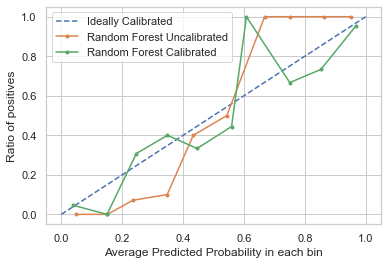

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.2, random_state=5)
calibrated = CalibratedClassifierCV(rf, method='sigmoid', cv=10)
calibrated.fit(xtrain, ytrain)
probs = calibrated.predict_proba(xtest)[:, 1]
uncalibrated = rf.predict_proba(xtest)[:,1]
fop_uncalibrated, mpv_uncalibrated = calibration_curve(ytest, uncalibrated, n_bins=10, normalize=True)
fop_calibrated, mpv_calibrated = calibration_curve(ytest, probs, n_bins=10, normalize=True)
plt.plot([0, 1], [0, 1], linestyle='--', label = 'Ideally Calibrated')
plt.plot(mpv_uncalibrated, fop_uncalibrated, marker='.', label = 'Random Forest Uncalibrated')
plt.plot(mpv_calibrated, fop_calibrated, marker='.', label = 'Random Forest Calibrated')
leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.show()

In [20]:
calibrated = CalibratedClassifierCV(rf, method='sigmoid', cv=10)
showResults(calibrated, "Random Forest Cal", X, Y)

K-fold cross-validation results:
Random Forest Cal  average accuracy is 0.881
Random Forest Cal  average log_loss is 0.299
Random Forest Cal  average brier score is 0.088
Random Forest Cal  average auc is 0.933
Random Forest Cal  average recall is 0.857
Random Forest Cal  average precision is 0.901
Random Forest Cal  average f1 is 0.876


In [62]:
dt = DecisionTreeClassifier(random_state=5)

cv = GridSearchCV(dt,params_DecisionT,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8, 16, 32, None],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12]},
             verbose=1)

In [63]:
display_results(cv)

Best parameters are: {'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 3, 'min_samples_split': 12}
Best Score is : 0.8499235474006117 


0.812 + or -0.118 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8}
0.812 + or -0.118 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.812 + or -0.118 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 12}
0.812 + or -0.118 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 8}
0.812 + or -0.118 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 10}
0.812 + or -0.118 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 12}
0.812 + or -0.118 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 8}
0.812 + or -0.118 for the {'criterion': 'gini', 'max_depth': 2, 'min_s

In [25]:
dt = DecisionTreeClassifier(random_state=5, 
                            criterion = 'entropy',
                            max_depth = 16,
                            min_samples_leaf = 3, 
                            min_samples_split = 12)
dt.fit(X,Y)

showResults(dt, "Decision Tree", X, Y)

K-fold cross-validation results:
Decision Tree  average accuracy is 0.850
Decision Tree  average log_loss is 3.442
Decision Tree  average brier score is 0.133
Decision Tree  average auc is 0.875
Decision Tree  average recall is 0.842
Decision Tree  average precision is 0.853
Decision Tree  average f1 is 0.844


In [64]:
knn = KNeighborsClassifier()

cv = GridSearchCV(knn,params_Knn,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [6, 8, 10, 12, 14, 16, 18, 20],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [65]:
display_results(cv)

Best parameters are: {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}
Best Score is : 0.8121984369690791 


0.756 + or -0.101 for the {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
0.771 + or -0.103 for the {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}
0.76 + or -0.094 for the {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'uniform'}
0.774 + or -0.097 for the {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}
0.77 + or -0.109 for the {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
0.783 + or -0.101 for the {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
0.768 + or -0.106 for the {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'uniform'}
0.785 + or -0.107 for the {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'distance'}
0.769 + or -0.094 for the {'metric': 'euclidean', 'n_neighbors': 14, 'weights': 'uniform'}
0.785 + or -0.1 for the {'metric': 'euclidean', 'n_neighbo

In [26]:
knn = KNeighborsClassifier(metric = 'manhattan',
                            n_neighbors = 20,
                            weights = 'distance')
knn.fit(X,Y)

showResults(knn, "KNN", X, Y)

K-fold cross-validation results:
KNN  average accuracy is 0.812
KNN  average log_loss is 0.570
KNN  average brier score is 0.147
KNN  average auc is 0.859
KNN  average recall is 0.823
KNN  average precision is 0.810
KNN  average f1 is 0.816


In [21]:
#RFECV with Logistic Regression Input
X = X_balanced[["Abnormal_Lung_Signs", "Antihypertensive_drug", "CKD", "COPD", "Cancers", "Cardiovascular_Disease", 
                "Chestpain", "Current_Smoking", "Diabetes", "Drug_history", "Dyspnea", "Fever", "History_hookah", 
                "Hospitalization_14_days_ago", "Hypertension", "Immunosuppressant_Drugs", "Oxygen_Saturation_Percent", 
                "Pantoprazole", "Sex", "Sweating"]]
Y = Y_balanced

In [67]:
rf = RandomForestClassifier(random_state=5)

cv = GridSearchCV(rf,params_randomf,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=5),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': range(100, 1000, 200)},
             verbose=1)

In [68]:
display_results(cv)

Best parameters are: {'max_depth': 32, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 700}
Best Score is : 0.815970098538906 


0.757 + or -0.125 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
0.764 + or -0.124 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}
0.751 + or -0.119 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 500}
0.756 + or -0.115 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 700}
0.755 + or -0.12 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 900}
0.757 + or -0.125 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.764 + or -0.124 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 300}
0.751 + or -0.119 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_sample

In [22]:
rf = RandomForestClassifier(random_state=5, 
                            max_depth = 32, 
                            min_samples_leaf = 3, 
                            min_samples_split = 10, 
                            n_estimators = 700)
rf.fit(X,Y)

showResults(rf, "Random Forest", X, Y)

K-fold cross-validation results:
Random Forest  average accuracy is 0.816
Random Forest  average log_loss is 0.438
Random Forest  average brier score is 0.140
Random Forest  average auc is 0.875
Random Forest  average recall is 0.788
Random Forest  average precision is 0.815
Random Forest  average f1 is 0.791


C:\Users\alish\anaconda3\lib\site-packages\sklearn\calibration.py:964: FutureWarning: The normalize argument is deprecated in v1.1 and will be removed in v1.3. Explicitly normalizing y_prob will reproduce this behavior, but it is recommended that a proper probability is used (i.e. a classifier's `predict_proba` positive class or `decision_function` output calibrated with `CalibratedClassifierCV`).
  warnings.warn(


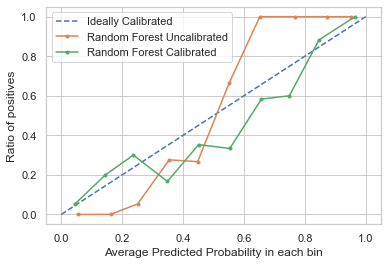

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.2, random_state=5)
calibrated = CalibratedClassifierCV(rf, method='sigmoid', cv=10)
calibrated.fit(xtrain, ytrain)
probs = calibrated.predict_proba(xtest)[:, 1]
uncalibrated = rf.predict_proba(xtest)[:,1]
fop_uncalibrated, mpv_uncalibrated = calibration_curve(ytest, uncalibrated, n_bins=10, normalize=True)
fop_calibrated, mpv_calibrated = calibration_curve(ytest, probs, n_bins=10, normalize=True)
plt.plot([0, 1], [0, 1], linestyle='--', label = 'Ideally Calibrated')
plt.plot(mpv_uncalibrated, fop_uncalibrated, marker='.', label = 'Random Forest Uncalibrated')
plt.plot(mpv_calibrated, fop_calibrated, marker='.', label = 'Random Forest Calibrated')
leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.show()

In [24]:
calibrated = CalibratedClassifierCV(rf, method='sigmoid', cv=10)
showResults(calibrated, "Random Forest Cal", X, Y)

K-fold cross-validation results:
Random Forest Cal  average accuracy is 0.805
Random Forest Cal  average log_loss is 0.435
Random Forest Cal  average brier score is 0.138
Random Forest Cal  average auc is 0.872
Random Forest Cal  average recall is 0.742
Random Forest Cal  average precision is 0.821
Random Forest Cal  average f1 is 0.768


In [69]:
dt = DecisionTreeClassifier(random_state=5)

cv = GridSearchCV(dt,params_DecisionT,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8, 16, 32, None],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12]},
             verbose=1)

In [70]:
display_results(cv)

Best parameters are: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 8}
Best Score is : 0.7901206252123684 


0.69 + or -0.092 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8}
0.69 + or -0.092 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.69 + or -0.092 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 12}
0.69 + or -0.092 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 8}
0.69 + or -0.092 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 10}
0.69 + or -0.092 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 12}
0.69 + or -0.092 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 8}
0.69 + or -0.092 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf':

In [30]:
dt = DecisionTreeClassifier(random_state=5, 
                            criterion = 'gini',
                            max_depth = 8,
                            min_samples_leaf = 4, 
                            min_samples_split = 8)
dt.fit(X,Y)

showResults(dt, "Decision Tree", X, Y)

K-fold cross-validation results:
Decision Tree  average accuracy is 0.790
Decision Tree  average log_loss is 2.303
Decision Tree  average brier score is 0.169
Decision Tree  average auc is 0.830
Decision Tree  average recall is 0.740
Decision Tree  average precision is 0.798
Decision Tree  average f1 is 0.758


In [71]:
knn = KNeighborsClassifier()

cv = GridSearchCV(knn,params_Knn,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [6, 8, 10, 12, 14, 16, 18, 20],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [72]:
display_results(cv)

Best parameters are: {'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}
Best Score is : 0.7280750934420659 


0.703 + or -0.086 for the {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
0.716 + or -0.081 for the {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}
0.694 + or -0.093 for the {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'uniform'}
0.711 + or -0.089 for the {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}
0.688 + or -0.085 for the {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
0.704 + or -0.089 for the {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
0.682 + or -0.105 for the {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'uniform'}
0.705 + or -0.084 for the {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'distance'}
0.678 + or -0.099 for the {'metric': 'euclidean', 'n_neighbors': 14, 'weights': 'uniform'}
0.7 + or -0.091 for the {'metric': 'euclidean', 'n_neighb

In [31]:
knn = KNeighborsClassifier(metric = 'manhattan',
                            n_neighbors = 6,
                            weights = 'distance')
knn.fit(X,Y)

showResults(knn, "KNN", X, Y)

K-fold cross-validation results:
KNN  average accuracy is 0.728
KNN  average log_loss is 1.517
KNN  average brier score is 0.196
KNN  average auc is 0.793
KNN  average recall is 0.822
KNN  average precision is 0.689
KNN  average f1 is 0.748


In [33]:
#RFECV with Logistic Regression Input + Post admission variables
X = X_balanced[['Abnormal_Lung_Signs', 'Age', 'Antihypertensive_drug', 'BMI', 'CKD', 'COPD', 
                'Cancers', 'Cardiovascular_Disease', 'Chestpain', 'Current_Smoking', 'Diabetes', 
                'Drug_history', 'Dyspnea', 'Fever', 'History_hookah', 'Hospitalization_14_days_ago', 
                'Hypertension', 'ICU_admission', 'Immunosuppressant_Drugs', 'Intubation_Duration_Day', 
                'NIV_Duration_Day', 'Oxygen_Saturation_Percent', 'Pantoprazole', 'Sex', 'Sweating']]
Y = Y_balanced

In [36]:
rf = RandomForestClassifier(random_state=5)

cv = GridSearchCV(rf,params_randomf,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=5),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': range(100, 1000, 200)},
             verbose=1)

In [37]:
display_results(cv)

Best parameters are: {'max_depth': 32, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 300}
Best Score is : 0.8851002378525313 


0.844 + or -0.104 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
0.832 + or -0.118 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}
0.833 + or -0.113 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 500}
0.835 + or -0.114 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 700}
0.834 + or -0.116 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 900}
0.844 + or -0.104 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.832 + or -0.118 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 300}
0.833 + or -0.113 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samp

In [34]:
rf = RandomForestClassifier(random_state=5, 
                            max_depth = 32, 
                            min_samples_leaf = 3, 
                            min_samples_split = 10, 
                            n_estimators = 300)
rf.fit(X,Y)

showResults(rf, "Random Forest", X, Y)

K-fold cross-validation results:
Random Forest  average accuracy is 0.885
Random Forest  average log_loss is 0.315
Random Forest  average brier score is 0.093
Random Forest  average auc is 0.928
Random Forest  average recall is 0.870
Random Forest  average precision is 0.896
Random Forest  average f1 is 0.880


In [38]:
dt = DecisionTreeClassifier(random_state=5)

cv = GridSearchCV(dt,params_DecisionT,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8, 16, 32, None],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12]},
             verbose=1)

In [39]:
display_results(cv)

Best parameters are: {'criterion': 'gini', 'max_depth': 16, 'min_samples_leaf': 3, 'min_samples_split': 12}
Best Score is : 0.8490570846075434 


0.818 + or -0.112 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8}
0.818 + or -0.112 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.818 + or -0.112 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 12}
0.818 + or -0.112 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 8}
0.818 + or -0.112 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 10}
0.818 + or -0.112 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 12}
0.818 + or -0.112 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 8}
0.818 + or -0.112 for the {'criterion': 'gini', 'max_depth': 2, 'min_samp

In [35]:
dt = DecisionTreeClassifier(random_state=5, 
                            criterion = 'gini',
                            max_depth = 16,
                            min_samples_leaf = 3, 
                            min_samples_split = 12)
dt.fit(X,Y)

showResults(dt, "Decision Tree", X, Y)

K-fold cross-validation results:
Decision Tree  average accuracy is 0.849
Decision Tree  average log_loss is 2.823
Decision Tree  average brier score is 0.130
Decision Tree  average auc is 0.880
Decision Tree  average recall is 0.844
Decision Tree  average precision is 0.855
Decision Tree  average f1 is 0.845


In [40]:
knn = KNeighborsClassifier()

cv = GridSearchCV(knn,params_Knn,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [6, 8, 10, 12, 14, 16, 18, 20],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [41]:
display_results(cv)

Best parameters are: {'metric': 'manhattan', 'n_neighbors': 16, 'weights': 'distance'}
Best Score is : 0.8084522595990485 


0.761 + or -0.104 for the {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
0.769 + or -0.092 for the {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}
0.769 + or -0.108 for the {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'uniform'}
0.766 + or -0.091 for the {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}
0.768 + or -0.099 for the {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
0.772 + or -0.101 for the {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
0.758 + or -0.104 for the {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'uniform'}
0.764 + or -0.103 for the {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'distance'}
0.755 + or -0.114 for the {'metric': 'euclidean', 'n_neighbors': 14, 'weights': 'uniform'}
0.766 + or -0.098 for the {'metric': 'euclidean', 'n_nei

In [36]:
knn = KNeighborsClassifier(metric = 'manhattan',
                            n_neighbors = 16,
                            weights = 'distance')
knn.fit(X,Y)

showResults(knn, "KNN", X, Y)

K-fold cross-validation results:
KNN  average accuracy is 0.808
KNN  average log_loss is 0.437
KNN  average brier score is 0.141
KNN  average auc is 0.873
KNN  average recall is 0.866
KNN  average precision is 0.782
KNN  average f1 is 0.821


In [25]:
#RFECV with Gradient Boosting Input
X = X_balanced[["Age", "CKD", "Cancers", "DiastolicBP", "Oxygen_Saturation_Percent"]]
Y = Y_balanced

In [43]:
rf = RandomForestClassifier(random_state=5)

cv = GridSearchCV(rf,params_randomf,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=5),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': range(100, 1000, 200)},
             verbose=1)

In [44]:
display_results(cv)

Best parameters are: {'max_depth': 32, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 500}
Best Score is : 0.7759004417261298 


0.679 + or -0.031 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
0.678 + or -0.035 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}
0.675 + or -0.034 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 500}
0.678 + or -0.035 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 700}
0.679 + or -0.034 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 900}
0.679 + or -0.031 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.678 + or -0.035 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 300}
0.675 + or -0.034 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_sampl

In [38]:
rf = RandomForestClassifier(random_state=5, 
                            max_depth = 32, 
                            min_samples_leaf = 3, 
                            min_samples_split = 8, 
                            n_estimators = 500)
rf.fit(X,Y)

showResults(rf, "Random Forest", X, Y)

K-fold cross-validation results:
Random Forest  average accuracy is 0.776
Random Forest  average log_loss is 0.495
Random Forest  average brier score is 0.162
Random Forest  average auc is 0.848
Random Forest  average recall is 0.786
Random Forest  average precision is 0.770
Random Forest  average f1 is 0.777


In [45]:
dt = DecisionTreeClassifier(random_state=5)

cv = GridSearchCV(dt,params_DecisionT,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8, 16, 32, None],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12]},
             verbose=1)

In [46]:
display_results(cv)

Best parameters are: {'criterion': 'gini', 'max_depth': 16, 'min_samples_leaf': 5, 'min_samples_split': 12}
Best Score is : 0.7472901800883454 


0.676 + or -0.035 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8}
0.676 + or -0.035 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.676 + or -0.035 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 12}
0.676 + or -0.035 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 8}
0.676 + or -0.035 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 10}
0.676 + or -0.035 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 12}
0.676 + or -0.035 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 8}
0.676 + or -0.035 for the {'criterion': 'gini', 'max_depth': 2, 'min_samp

In [41]:
dt = DecisionTreeClassifier(random_state=5, 
                            criterion = 'gini',
                            max_depth = 16,
                            min_samples_leaf = 5, 
                            min_samples_split = 12)
dt.fit(X,Y)

showResults(dt, "Decision Tree", X, Y)

K-fold cross-validation results:
Decision Tree  average accuracy is 0.747
Decision Tree  average log_loss is 3.443
Decision Tree  average brier score is 0.203
Decision Tree  average auc is 0.792
Decision Tree  average recall is 0.747
Decision Tree  average precision is 0.747
Decision Tree  average f1 is 0.746


In [47]:
knn = KNeighborsClassifier()

cv = GridSearchCV(knn,params_Knn,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [6, 8, 10, 12, 14, 16, 18, 20],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [48]:
display_results(cv)

Best parameters are: {'metric': 'euclidean', 'n_neighbors': 14, 'weights': 'distance'}
Best Score is : 0.7786102616377845 


0.745 + or -0.039 for the {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
0.771 + or -0.046 for the {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}
0.732 + or -0.04 for the {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'uniform'}
0.77 + or -0.042 for the {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}
0.728 + or -0.038 for the {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
0.77 + or -0.033 for the {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
0.729 + or -0.031 for the {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'uniform'}
0.773 + or -0.027 for the {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'distance'}
0.735 + or -0.032 for the {'metric': 'euclidean', 'n_neighbors': 14, 'weights': 'uniform'}
0.779 + or -0.021 for the {'metric': 'euclidean', 'n_neighb

In [26]:
knn = KNeighborsClassifier(metric = 'euclidean',
                            n_neighbors = 14,
                            weights = 'distance')
knn.fit(X,Y)

showResults(knn, "KNN", X, Y)

K-fold cross-validation results:
KNN  average accuracy is 0.779
KNN  average log_loss is 0.726
KNN  average brier score is 0.163
KNN  average auc is 0.845
KNN  average recall is 0.871
KNN  average precision is 0.736
KNN  average f1 is 0.797


C:\Users\alish\anaconda3\lib\site-packages\sklearn\calibration.py:964: FutureWarning: The normalize argument is deprecated in v1.1 and will be removed in v1.3. Explicitly normalizing y_prob will reproduce this behavior, but it is recommended that a proper probability is used (i.e. a classifier's `predict_proba` positive class or `decision_function` output calibrated with `CalibratedClassifierCV`).
  warnings.warn(


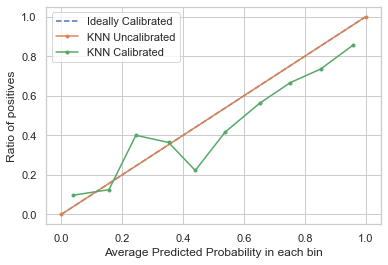

In [27]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.2, random_state=5)
calibrated = CalibratedClassifierCV(knn, method='sigmoid', cv=10)
calibrated.fit(xtrain, ytrain)
probs = calibrated.predict_proba(xtest)[:, 1]
uncalibrated = knn.predict_proba(xtest)[:,1]
fop_uncalibrated, mpv_uncalibrated = calibration_curve(ytest, uncalibrated, n_bins=10, normalize=True)
fop_calibrated, mpv_calibrated = calibration_curve(ytest, probs, n_bins=10, normalize=True)
plt.plot([0, 1], [0, 1], linestyle='--', label = 'Ideally Calibrated')
plt.plot(mpv_uncalibrated, fop_uncalibrated, marker='.', label = 'KNN Uncalibrated')
plt.plot(mpv_calibrated, fop_calibrated, marker='.', label = 'KNN Calibrated')
leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.show()

In [28]:
calibrated = CalibratedClassifierCV(knn, method='sigmoid', cv=10)
showResults(calibrated, "KNN Cal", X, Y)

K-fold cross-validation results:
KNN Cal  average accuracy is 0.771
KNN Cal  average log_loss is 0.493
KNN Cal  average brier score is 0.161
KNN Cal  average auc is 0.842
KNN Cal  average recall is 0.792
KNN Cal  average precision is 0.761
KNN Cal  average f1 is 0.775


In [43]:
#RFECV with Gradient Boosting Input + Post admission variables
X = X_balanced[['Age', 'CKD', 'ICU_admission', 'Intubation_Duration_Day']]
Y = Y_balanced

In [50]:
rf = RandomForestClassifier(random_state=5)

cv = GridSearchCV(rf,params_randomf,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=5),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': range(100, 1000, 200)},
             verbose=1)

In [51]:
display_results(cv)

Best parameters are: {'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 100}
Best Score is : 0.827760788311247 


0.815 + or -0.118 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
0.815 + or -0.118 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}
0.815 + or -0.118 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 500}
0.815 + or -0.118 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 700}
0.815 + or -0.118 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 900}
0.815 + or -0.118 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.815 + or -0.118 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 300}
0.815 + or -0.118 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_sample

In [44]:
rf = RandomForestClassifier(random_state=5, 
                            max_depth = 8, 
                            min_samples_leaf = 3, 
                            min_samples_split = 12, 
                            n_estimators = 100)
rf.fit(X,Y)

showResults(rf, "Random Forest", X, Y)

K-fold cross-validation results:
Random Forest  average accuracy is 0.828
Random Forest  average log_loss is 0.381
Random Forest  average brier score is 0.124
Random Forest  average auc is 0.898
Random Forest  average recall is 0.790
Random Forest  average precision is 0.862
Random Forest  average f1 is 0.821


In [52]:
dt = DecisionTreeClassifier(random_state=5)

cv = GridSearchCV(dt,params_DecisionT,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8, 16, 32, None],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12]},
             verbose=1)

In [53]:
display_results(cv)

Best parameters are: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 8}
Best Score is : 0.8332313965341488 


0.812 + or -0.118 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8}
0.812 + or -0.118 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.812 + or -0.118 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 12}
0.812 + or -0.118 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 8}
0.812 + or -0.118 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 10}
0.812 + or -0.118 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 12}
0.812 + or -0.118 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 8}
0.812 + or -0.118 for the {'criterion': 'gini', 'max_depth': 2, 'min_sam

In [45]:
dt = DecisionTreeClassifier(random_state=5, 
                            criterion = 'entropy',
                            max_depth = 4,
                            min_samples_leaf = 5, 
                            min_samples_split = 8)
dt.fit(X,Y)

showResults(dt, "Decision Tree", X, Y)

K-fold cross-validation results:
Decision Tree  average accuracy is 0.833
Decision Tree  average log_loss is 0.580
Decision Tree  average brier score is 0.123
Decision Tree  average auc is 0.895
Decision Tree  average recall is 0.785
Decision Tree  average precision is 0.869
Decision Tree  average f1 is 0.822


In [54]:
knn = KNeighborsClassifier()

cv = GridSearchCV(knn,params_Knn,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [6, 8, 10, 12, 14, 16, 18, 20],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [55]:
display_results(cv)

Best parameters are: {'metric': 'euclidean', 'n_neighbors': 20, 'weights': 'uniform'}
Best Score is : 0.8074498810737344 


0.795 + or -0.073 for the {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
0.763 + or -0.072 for the {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}
0.794 + or -0.077 for the {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'uniform'}
0.771 + or -0.076 for the {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}
0.797 + or -0.08 for the {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
0.771 + or -0.076 for the {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
0.8 + or -0.09 for the {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'uniform'}
0.776 + or -0.079 for the {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'distance'}
0.802 + or -0.098 for the {'metric': 'euclidean', 'n_neighbors': 14, 'weights': 'uniform'}
0.777 + or -0.08 for the {'metric': 'euclidean', 'n_neighbors

In [46]:
knn = KNeighborsClassifier(metric = 'euclidean',
                            n_neighbors = 20,
                            weights = 'uniform')
knn.fit(X,Y)

showResults(knn, "KNN", X, Y)

K-fold cross-validation results:
KNN  average accuracy is 0.807
KNN  average log_loss is 0.513
KNN  average brier score is 0.132
KNN  average auc is 0.889
KNN  average recall is 0.753
KNN  average precision is 0.849
KNN  average f1 is 0.796


In [49]:
#RFECV with Random Forest Input
X = X_balanced[["Abnormal_Lung_Signs", "Age", "Antihypertensive_drug", "Average_Daily_Use_Cigarettes", "BMI", 
                "CKD", "COPD", "Cancers", "Cardiovascular_Disease", "Chestpain","Current_Smoking", 
                "Diabetes", "DiastolicBP", "Drug_history", "Dyspnea", "Fever", "History_hookah", 
                "Hospitalization_14_days_ago", "Hypertension", "Immunosuppressant_Drugs", 
                "Oxygen_Saturation_Percent", "Pantoprazole", "Respiratory_rate", "Sex", "Sweating", 
                "SystolicBP", "Total_Lung_Involvement_Percent"]]
Y = Y_balanced

In [57]:
rf = RandomForestClassifier(random_state=5)

cv = GridSearchCV(rf,params_randomf,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=5),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': range(100, 1000, 200)},
             verbose=1)

In [58]:
display_results(cv)

Best parameters are: {'max_depth': 16, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 700}
Best Score is : 0.8490400951410126 


0.765 + or -0.052 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
0.762 + or -0.06 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}
0.76 + or -0.053 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 500}
0.762 + or -0.053 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 700}
0.763 + or -0.055 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 900}
0.765 + or -0.052 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.762 + or -0.06 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 300}
0.76 + or -0.053 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_

In [50]:
rf = RandomForestClassifier(random_state=5, 
                            max_depth = 16, 
                            min_samples_leaf = 3, 
                            min_samples_split = 10, 
                            n_estimators = 700)
rf.fit(X,Y)

showResults(rf, "Random Forest", X, Y)

K-fold cross-validation results:
Random Forest  average accuracy is 0.849
Random Forest  average log_loss is 0.398
Random Forest  average brier score is 0.121
Random Forest  average auc is 0.919
Random Forest  average recall is 0.832
Random Forest  average precision is 0.855
Random Forest  average f1 is 0.837


In [ ]:
dt = DecisionTreeClassifier(random_state=5)

cv = GridSearchCV(dt,params_DecisionT,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

In [60]:
display_results(cv)

Best parameters are: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 10}
Best Score is : 0.8001274209989806 


0.735 + or -0.044 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8}
0.735 + or -0.044 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.735 + or -0.044 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 12}
0.735 + or -0.044 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 8}
0.735 + or -0.044 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 10}
0.735 + or -0.044 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 12}
0.735 + or -0.044 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 8}
0.735 + or -0.044 for the {'criterion': 'gini', 'max_depth': 2, 'min_sampl

In [51]:
dt = DecisionTreeClassifier(random_state=5, 
                            criterion = 'gini',
                            max_depth = 8,
                            min_samples_leaf = 3, 
                            min_samples_split = 10)
dt.fit(X,Y)

showResults(dt, "Decision Tree", X, Y)

K-fold cross-validation results:
Decision Tree  average accuracy is 0.800
Decision Tree  average log_loss is 2.235
Decision Tree  average brier score is 0.161
Decision Tree  average auc is 0.850
Decision Tree  average recall is 0.796
Decision Tree  average precision is 0.796
Decision Tree  average f1 is 0.789


In [61]:
knn = KNeighborsClassifier()

cv = GridSearchCV(knn,params_Knn,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [6, 8, 10, 12, 14, 16, 18, 20],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [62]:
display_results(cv)

Best parameters are: {'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}
Best Score is : 0.7354400271831465 


0.71 + or -0.073 for the {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
0.72 + or -0.064 for the {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}
0.684 + or -0.102 for the {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'uniform'}
0.703 + or -0.088 for the {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}
0.692 + or -0.079 for the {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
0.705 + or -0.097 for the {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
0.69 + or -0.102 for the {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'uniform'}
0.708 + or -0.091 for the {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'distance'}
0.682 + or -0.091 for the {'metric': 'euclidean', 'n_neighbors': 14, 'weights': 'uniform'}
0.706 + or -0.085 for the {'metric': 'euclidean', 'n_neighbo

In [52]:
knn = KNeighborsClassifier(metric = 'manhattan',
                            n_neighbors = 6,
                            weights = 'distance')
knn.fit(X,Y)

showResults(knn, "KNN", X, Y)

K-fold cross-validation results:
KNN  average accuracy is 0.735
KNN  average log_loss is 1.312
KNN  average brier score is 0.181
KNN  average auc is 0.825
KNN  average recall is 0.857
KNN  average precision is 0.688
KNN  average f1 is 0.762


In [53]:
#RFECV with Random Forest Input + Post admission variables
X = X_balanced[['Abnormal_Lung_Signs', 'Age', 'Average_Daily_Use_Cigarettes', 'BMI', 'CKD', 'Cancers',
                'DiastolicBP', 'Drug_history', 'Dyspnea', 'Fever', 'Hospitalization_14_days_ago',
                'Hypertension', 'ICU_admission', 'Intubation_Duration_Day', 'Oxygen_Saturation_Percent',
                'Pantoprazole', 'Respiratory_rate', 'SystolicBP']]
Y = Y_balanced

In [12]:
rf = RandomForestClassifier(random_state=5)

cv = GridSearchCV(rf,params_randomf,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=5),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': range(100, 1000, 200)},
             verbose=1)

In [13]:
display_results(cv)

Best parameters are: {'max_depth': 16, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
Best Score is : 0.8812945973496433 


0.832 + or -0.095 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
0.821 + or -0.121 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}
0.829 + or -0.125 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 500}
0.824 + or -0.124 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 700}
0.823 + or -0.124 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 900}
0.832 + or -0.095 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.821 + or -0.121 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 300}
0.829 + or -0.125 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_sampl

In [54]:
rf = RandomForestClassifier(random_state=5, 
                            max_depth = 16, 
                            min_samples_leaf = 3, 
                            min_samples_split = 8, 
                            n_estimators = 100)
rf.fit(X,Y)

showResults(rf, "Random Forest", X, Y)

K-fold cross-validation results:
Random Forest  average accuracy is 0.881
Random Forest  average log_loss is 0.321
Random Forest  average brier score is 0.094
Random Forest  average auc is 0.932
Random Forest  average recall is 0.870
Random Forest  average precision is 0.891
Random Forest  average f1 is 0.878


In [14]:
dt = DecisionTreeClassifier(random_state=5)

cv = GridSearchCV(dt,params_DecisionT,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8, 16, 32, None],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12]},
             verbose=1)

In [15]:
display_results(cv)

Best parameters are: {'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 3, 'min_samples_split': 12}
Best Score is : 0.8425416241930005 


0.812 + or -0.118 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8}
0.812 + or -0.118 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.812 + or -0.118 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 12}
0.812 + or -0.118 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 8}
0.812 + or -0.118 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 10}
0.812 + or -0.118 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 12}
0.812 + or -0.118 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 8}
0.812 + or -0.118 for the {'criterion': 'gini', 'max_depth': 2, 'min_s

In [55]:
dt = DecisionTreeClassifier(random_state=5, 
                            criterion = 'entropy',
                            max_depth = 16,
                            min_samples_leaf = 3, 
                            min_samples_split = 12)
dt.fit(X,Y)

showResults(dt, "Decision Tree", X, Y)

K-fold cross-validation results:
Decision Tree  average accuracy is 0.843
Decision Tree  average log_loss is 3.541
Decision Tree  average brier score is 0.137
Decision Tree  average auc is 0.872
Decision Tree  average recall is 0.833
Decision Tree  average precision is 0.847
Decision Tree  average f1 is 0.837


In [16]:
knn = KNeighborsClassifier()

cv = GridSearchCV(knn,params_Knn,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [6, 8, 10, 12, 14, 16, 18, 20],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [17]:
display_results(cv)

Best parameters are: {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}
Best Score is : 0.8223496432212029 


0.76 + or -0.1 for the {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
0.794 + or -0.103 for the {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}
0.774 + or -0.096 for the {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'uniform'}
0.796 + or -0.091 for the {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}
0.766 + or -0.088 for the {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
0.798 + or -0.101 for the {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
0.773 + or -0.089 for the {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'uniform'}
0.799 + or -0.105 for the {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'distance'}
0.781 + or -0.096 for the {'metric': 'euclidean', 'n_neighbors': 14, 'weights': 'uniform'}
0.795 + or -0.112 for the {'metric': 'euclidean', 'n_neighb

In [56]:
knn = KNeighborsClassifier(metric = 'manhattan',
                            n_neighbors = 20,
                            weights = 'distance')
knn.fit(X,Y)

showResults(knn, "KNN", X, Y)

K-fold cross-validation results:
KNN  average accuracy is 0.822
KNN  average log_loss is 0.535
KNN  average brier score is 0.143
KNN  average auc is 0.866
KNN  average recall is 0.842
KNN  average precision is 0.816
KNN  average f1 is 0.828


In [57]:
#Feature importance with Random Forest Input
X = X_balanced[["Age", "CKD", "Oxygen_Saturation_Percent" , "DiastolicBP" , "BMI", 
                "Hypertension", "Cancers", "Cardiovascular_Disease", "Hospitalization_14_days_ago" ,
                "Abnormal_Lung_Signs", "Average_Daily_Use_Cigarettes" , "Pantoprazole"]]
Y = Y_balanced

In [19]:
rf = RandomForestClassifier(random_state=5)

cv = GridSearchCV(rf,params_randomf,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=5),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': range(100, 1000, 200)},
             verbose=1)

In [20]:
display_results(cv)

Best parameters are: {'max_depth': 16, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
Best Score is : 0.8165392456676861 


0.731 + or -0.033 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
0.736 + or -0.033 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}
0.741 + or -0.035 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 500}
0.739 + or -0.038 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 700}
0.738 + or -0.034 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 900}
0.731 + or -0.033 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.736 + or -0.033 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 300}
0.741 + or -0.035 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_sampl

In [60]:
rf = RandomForestClassifier(random_state=5, 
                            max_depth = 16, 
                            min_samples_leaf = 3, 
                            min_samples_split = 8, 
                            n_estimators = 100)
rf.fit(X,Y)

showResults(rf, "Random Forest", X, Y)

K-fold cross-validation results:
Random Forest  average accuracy is 0.817
Random Forest  average log_loss is 0.438
Random Forest  average brier score is 0.138
Random Forest  average auc is 0.897
Random Forest  average recall is 0.836
Random Forest  average precision is 0.806
Random Forest  average f1 is 0.818


In [21]:
dt = DecisionTreeClassifier(random_state=5)

cv = GridSearchCV(dt,params_DecisionT,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8, 16, 32, None],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12]},
             verbose=1)

In [22]:
display_results(cv)

Best parameters are: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 12}
Best Score is : 0.7649762147468568 


0.716 + or -0.032 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8}
0.716 + or -0.032 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.716 + or -0.032 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 12}
0.716 + or -0.032 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 8}
0.716 + or -0.032 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 10}
0.716 + or -0.032 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 12}
0.716 + or -0.032 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 8}
0.716 + or -0.032 for the {'criterion': 'gini', 'max_depth': 2, 'min_sa

In [59]:
dt = DecisionTreeClassifier(random_state=5, 
                            criterion = 'entropy',
                            max_depth = 8,
                            min_samples_leaf = 3, 
                            min_samples_split = 12)
dt.fit(X,Y)

showResults(dt, "Decision Tree", X, Y)

K-fold cross-validation results:
Decision Tree  average accuracy is 0.765
Decision Tree  average log_loss is 2.501
Decision Tree  average brier score is 0.185
Decision Tree  average auc is 0.814
Decision Tree  average recall is 0.746
Decision Tree  average precision is 0.773
Decision Tree  average f1 is 0.755


In [23]:
knn = KNeighborsClassifier()

cv = GridSearchCV(knn,params_Knn,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [6, 8, 10, 12, 14, 16, 18, 20],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [24]:
display_results(cv)

Best parameters are: {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'distance'}
Best Score is : 0.7418195718654435 


0.695 + or -0.046 for the {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
0.733 + or -0.061 for the {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}
0.698 + or -0.05 for the {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'uniform'}
0.734 + or -0.06 for the {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}
0.698 + or -0.06 for the {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
0.74 + or -0.059 for the {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
0.679 + or -0.045 for the {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'uniform'}
0.742 + or -0.058 for the {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'distance'}
0.663 + or -0.055 for the {'metric': 'euclidean', 'n_neighbors': 14, 'weights': 'uniform'}
0.734 + or -0.055 for the {'metric': 'euclidean', 'n_neighbo

In [61]:
knn = KNeighborsClassifier(metric = 'euclidean',
                            n_neighbors = 12,
                            weights = 'distance')
knn.fit(X,Y)

showResults(knn, "KNN", X, Y)

K-fold cross-validation results:
KNN  average accuracy is 0.742
KNN  average log_loss is 0.594
KNN  average brier score is 0.180
KNN  average auc is 0.808
KNN  average recall is 0.783
KNN  average precision is 0.724
KNN  average f1 is 0.748


In [62]:
#Feature importance with Random Forest Input + Post admission variables
X = X_balanced[["Intubation_Duration_Day", "Cancers", "CKD", "ICU_admission", "DiastolicBP",
               "SystolicBP", "Oxygen_Saturation_Percent", "Hospitalization_14_days_ago", "Chestpain",
               "Antihypertensive_drug", "Sweating", "BMI", "Cardiovascular_Disease", "Pantoprazole", 
               "Current_Smoking", "Average_Daily_Use_Cigarettes"]]
Y = Y_balanced

In [26]:
rf = RandomForestClassifier(random_state=5)

cv = GridSearchCV(rf,params_randomf,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=5),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': range(100, 1000, 200)},
             verbose=1)

In [27]:
display_results(cv)

Best parameters are: {'max_depth': 16, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}
Best Score is : 0.8813710499490316 


0.834 + or -0.109 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
0.832 + or -0.108 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}
0.832 + or -0.106 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 500}
0.833 + or -0.107 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 700}
0.833 + or -0.107 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 900}
0.834 + or -0.109 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.832 + or -0.108 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 300}
0.832 + or -0.106 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_sampl

In [63]:
rf = RandomForestClassifier(random_state=5, 
                            max_depth = 16, 
                            min_samples_leaf = 3, 
                            min_samples_split = 8, 
                            n_estimators = 300)
rf.fit(X,Y)

showResults(rf, "Random Forest", X, Y)

K-fold cross-validation results:
Random Forest  average accuracy is 0.881
Random Forest  average log_loss is 0.319
Random Forest  average brier score is 0.094
Random Forest  average auc is 0.925
Random Forest  average recall is 0.877
Random Forest  average precision is 0.884
Random Forest  average f1 is 0.878


In [28]:
dt = DecisionTreeClassifier(random_state=5)

cv = GridSearchCV(dt,params_DecisionT,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8, 16, 32, None],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12]},
             verbose=1)

In [29]:
display_results(cv)

Best parameters are: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 8}
Best Score is : 0.8306659870880054 


0.82 + or -0.112 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8}
0.82 + or -0.112 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.82 + or -0.112 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 12}
0.82 + or -0.112 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 8}
0.82 + or -0.112 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 10}
0.82 + or -0.112 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 12}
0.82 + or -0.112 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 8}
0.82 + or -0.112 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf':

In [64]:
dt = DecisionTreeClassifier(random_state=5, 
                            criterion = 'gini',
                            max_depth = 4,
                            min_samples_leaf = 3, 
                            min_samples_split = 8)
dt.fit(X,Y)

showResults(dt, "Decision Tree", X, Y)

K-fold cross-validation results:
Decision Tree  average accuracy is 0.831
Decision Tree  average log_loss is 0.669
Decision Tree  average brier score is 0.138
Decision Tree  average auc is 0.862
Decision Tree  average recall is 0.851
Decision Tree  average precision is 0.817
Decision Tree  average f1 is 0.833


In [30]:
knn = KNeighborsClassifier()

cv = GridSearchCV(knn,params_Knn,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [6, 8, 10, 12, 14, 16, 18, 20],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [31]:
display_results(cv)

Best parameters are: {'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}
Best Score is : 0.8203873598369011 


0.781 + or -0.072 for the {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
0.814 + or -0.085 for the {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}
0.768 + or -0.065 for the {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'uniform'}
0.806 + or -0.088 for the {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}
0.772 + or -0.087 for the {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
0.804 + or -0.094 for the {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
0.776 + or -0.088 for the {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'uniform'}
0.799 + or -0.095 for the {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'distance'}
0.772 + or -0.081 for the {'metric': 'euclidean', 'n_neighbors': 14, 'weights': 'uniform'}
0.798 + or -0.098 for the {'metric': 'euclidean', 'n_neig

In [65]:
knn = KNeighborsClassifier(metric = 'manhattan',
                            n_neighbors = 6,
                            weights = 'distance')
knn.fit(X,Y)

showResults(knn, "KNN", X, Y)

K-fold cross-validation results:
KNN  average accuracy is 0.820
KNN  average log_loss is 1.455
KNN  average brier score is 0.136
KNN  average auc is 0.878
KNN  average recall is 0.809
KNN  average precision is 0.830
KNN  average f1 is 0.818


In [29]:
#Feature Importance Gradient Boosting
X = X_balanced[["Age" , "Oxygen_Saturation_Percent", "CKD","Respiratory_rate", "DiastolicBP", 
                "SystolicBP","BMI", "Average_Daily_Use_Cigarettes" , "Pantoprazole", "Cancers",
                "Hypertension", "Abnormal_Lung_Signs", "Drug_history", "Sex", 
                "Total_Lung_Involvement_Percent", "Hospitalization_14_days_ago",
                "Current_Smoking", "Cardiovascular_Disease", "COPD", "Diabetes"]]
Y = Y_balanced

In [33]:
rf = RandomForestClassifier(random_state=5)

cv = GridSearchCV(rf,params_randomf,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=5),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': range(100, 1000, 200)},
             verbose=1)

In [34]:
display_results(cv)

Best parameters are: {'max_depth': 32, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 900}
Best Score is : 0.8517499150526675 


0.749 + or -0.04 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
0.755 + or -0.05 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}
0.754 + or -0.042 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 500}
0.752 + or -0.042 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 700}
0.756 + or -0.042 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 900}
0.749 + or -0.04 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.755 + or -0.05 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 300}
0.754 + or -0.042 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_s

In [30]:
rf = RandomForestClassifier(random_state=5, 
                            max_depth = 32, 
                            min_samples_leaf = 3, 
                            min_samples_split = 8, 
                            n_estimators = 900)
rf.fit(X,Y)

showResults(rf, "Random Forest", X, Y)

K-fold cross-validation results:
Random Forest  average accuracy is 0.852
Random Forest  average log_loss is 0.397
Random Forest  average brier score is 0.121
Random Forest  average auc is 0.925
Random Forest  average recall is 0.844
Random Forest  average precision is 0.854
Random Forest  average f1 is 0.844


C:\Users\alish\anaconda3\lib\site-packages\sklearn\calibration.py:964: FutureWarning: The normalize argument is deprecated in v1.1 and will be removed in v1.3. Explicitly normalizing y_prob will reproduce this behavior, but it is recommended that a proper probability is used (i.e. a classifier's `predict_proba` positive class or `decision_function` output calibrated with `CalibratedClassifierCV`).
  warnings.warn(


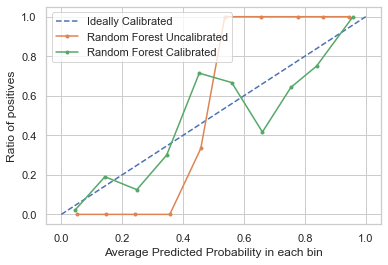

In [31]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.2, random_state=5)
calibrated = CalibratedClassifierCV(rf, method='sigmoid', cv=10)
calibrated.fit(xtrain, ytrain)
probs = calibrated.predict_proba(xtest)[:, 1]
uncalibrated = rf.predict_proba(xtest)[:,1]
fop_uncalibrated, mpv_uncalibrated = calibration_curve(ytest, uncalibrated, n_bins=10, normalize=True)
fop_calibrated, mpv_calibrated = calibration_curve(ytest, probs, n_bins=10, normalize=True)
plt.plot([0, 1], [0, 1], linestyle='--', label = 'Ideally Calibrated')
plt.plot(mpv_uncalibrated, fop_uncalibrated, marker='.', label = 'Random Forest Uncalibrated')
plt.plot(mpv_calibrated, fop_calibrated, marker='.', label = 'Random Forest Calibrated')
leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.show()

In [32]:
calibrated = CalibratedClassifierCV(rf, method='sigmoid', cv=10)
showResults(calibrated, "Random Forest Cal", X, Y)

K-fold cross-validation results:
Random Forest Cal  average accuracy is 0.851
Random Forest Cal  average log_loss is 0.353
Random Forest Cal  average brier score is 0.110
Random Forest Cal  average auc is 0.922
Random Forest Cal  average recall is 0.830
Random Forest Cal  average precision is 0.863
Random Forest Cal  average f1 is 0.839


In [35]:
dt = DecisionTreeClassifier(random_state=5)

cv = GridSearchCV(dt,params_DecisionT,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8, 16, 32, None],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12]},
             verbose=1)

In [36]:
display_results(cv)

Best parameters are: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 12}
Best Score is : 0.8084267753992525 


0.735 + or -0.044 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8}
0.735 + or -0.044 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.735 + or -0.044 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 12}
0.735 + or -0.044 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 8}
0.735 + or -0.044 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 10}
0.735 + or -0.044 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 12}
0.735 + or -0.044 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 8}
0.735 + or -0.044 for the {'criterion': 'gini', 'max_depth': 2, 'min_sampl

In [33]:
dt = DecisionTreeClassifier(random_state=5, 
                            criterion = 'gini',
                            max_depth = 8,
                            min_samples_leaf = 3, 
                            min_samples_split = 12)
dt.fit(X,Y)

showResults(dt, "Decision Tree", X, Y)

K-fold cross-validation results:
Decision Tree  average accuracy is 0.808
Decision Tree  average log_loss is 2.222
Decision Tree  average brier score is 0.158
Decision Tree  average auc is 0.855
Decision Tree  average recall is 0.802
Decision Tree  average precision is 0.805
Decision Tree  average f1 is 0.797


C:\Users\alish\anaconda3\lib\site-packages\sklearn\calibration.py:964: FutureWarning: The normalize argument is deprecated in v1.1 and will be removed in v1.3. Explicitly normalizing y_prob will reproduce this behavior, but it is recommended that a proper probability is used (i.e. a classifier's `predict_proba` positive class or `decision_function` output calibrated with `CalibratedClassifierCV`).
  warnings.warn(


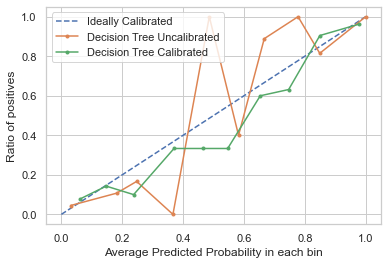

In [34]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.2, random_state=5)
calibrated = CalibratedClassifierCV(dt, method='sigmoid', cv=10)
calibrated.fit(xtrain, ytrain)
probs = calibrated.predict_proba(xtest)[:, 1]
uncalibrated = dt.predict_proba(xtest)[:,1]
fop_uncalibrated, mpv_uncalibrated = calibration_curve(ytest, uncalibrated, n_bins=10, normalize=True)
fop_calibrated, mpv_calibrated = calibration_curve(ytest, probs, n_bins=10, normalize=True)
plt.plot([0, 1], [0, 1], linestyle='--', label = 'Ideally Calibrated')
plt.plot(mpv_uncalibrated, fop_uncalibrated, marker='.', label = 'Decision Tree Uncalibrated')
plt.plot(mpv_calibrated, fop_calibrated, marker='.', label = 'Decision Tree Calibrated')
leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.show()

In [35]:
calibrated = CalibratedClassifierCV(dt, method='sigmoid', cv=10)
showResults(calibrated, "Decision Tree Cal", X, Y)

K-fold cross-validation results:
Decision Tree Cal  average accuracy is 0.815
Decision Tree Cal  average log_loss is 0.447
Decision Tree Cal  average brier score is 0.139
Decision Tree Cal  average auc is 0.890
Decision Tree Cal  average recall is 0.787
Decision Tree Cal  average precision is 0.825
Decision Tree Cal  average f1 is 0.796


In [37]:
knn = KNeighborsClassifier()

cv = GridSearchCV(knn,params_Knn,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [6, 8, 10, 12, 14, 16, 18, 20],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [38]:
display_results(cv)

Best parameters are: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
Best Score is : 0.7686034658511722 


0.69 + or -0.058 for the {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
0.739 + or -0.074 for the {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}
0.702 + or -0.062 for the {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'uniform'}
0.74 + or -0.076 for the {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}
0.694 + or -0.056 for the {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
0.738 + or -0.071 for the {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
0.673 + or -0.058 for the {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'uniform'}
0.737 + or -0.068 for the {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'distance'}
0.662 + or -0.06 for the {'metric': 'euclidean', 'n_neighbors': 14, 'weights': 'uniform'}
0.725 + or -0.068 for the {'metric': 'euclidean', 'n_neighb

In [68]:
knn = KNeighborsClassifier(metric = 'manhattan',
                            n_neighbors = 10,
                            weights = 'distance')
knn.fit(X,Y)

showResults(knn, "KNN", X, Y)

K-fold cross-validation results:
KNN  average accuracy is 0.769
KNN  average log_loss is 0.743
KNN  average brier score is 0.170
KNN  average auc is 0.828
KNN  average recall is 0.779
KNN  average precision is 0.761
KNN  average f1 is 0.768


In [70]:
#Feature Importance Gradient Boosting + Post admission variables
X = X_balanced[["ICU_admission", "Age", "Intubation_Duration_Day", "Oxygen_Saturation_Percent", "CKD", 
               "Cancers", "Respiratory_rate", "SystolicBP", "DiastolicBP", "BMI", "Average_Daily_Use_Cigarettes",
               "Drug_history", "Abnormal_Lung_Signs", "COPD", "Sweating", "Total_Lung_Involvement_Percent", 
                "Chestpain", "Cardiovascular_Disease", "Sex", "Hospitalization_14_days_ago"]]
Y = Y_balanced

In [12]:
rf = RandomForestClassifier(random_state=5)

cv = GridSearchCV(rf,params_randomf,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=5),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': range(100, 1000, 200)},
             verbose=1)

In [13]:
display_results(cv)

Best parameters are: {'max_depth': 16, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 500}
Best Score is : 0.8822205232755692 


0.843 + or -0.109 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
0.838 + or -0.114 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}
0.839 + or -0.117 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 500}
0.838 + or -0.115 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 700}
0.838 + or -0.116 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 900}
0.843 + or -0.109 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.838 + or -0.114 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 300}
0.839 + or -0.117 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_sampl

In [71]:
rf = RandomForestClassifier(random_state=5, 
                            max_depth = 16, 
                            min_samples_leaf = 3, 
                            min_samples_split = 8, 
                            n_estimators = 500)
rf.fit(X,Y)

showResults(rf, "Random Forest", X, Y)

K-fold cross-validation results:
Random Forest  average accuracy is 0.882
Random Forest  average log_loss is 0.309
Random Forest  average brier score is 0.091
Random Forest  average auc is 0.935
Random Forest  average recall is 0.877
Random Forest  average precision is 0.888
Random Forest  average f1 is 0.880


In [14]:
dt = DecisionTreeClassifier(random_state=5)

cv = GridSearchCV(dt,params_DecisionT,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8, 16, 32, None],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12]},
             verbose=1)

In [15]:
display_results(cv)

Best parameters are: {'criterion': 'gini', 'max_depth': 16, 'min_samples_leaf': 5, 'min_samples_split': 8}
Best Score is : 0.836128100577642 


0.818 + or -0.112 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8}
0.818 + or -0.112 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.818 + or -0.112 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 12}
0.818 + or -0.112 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 8}
0.818 + or -0.112 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 10}
0.818 + or -0.112 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 12}
0.818 + or -0.112 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 8}
0.818 + or -0.112 for the {'criterion': 'gini', 'max_depth': 2, 'min_sample

In [72]:
dt = DecisionTreeClassifier(random_state=5, 
                            criterion = 'gini',
                            max_depth = 16,
                            min_samples_leaf = 5, 
                            min_samples_split = 8)
dt.fit(X,Y)

showResults(dt, "Decision Tree", X, Y)

K-fold cross-validation results:
Decision Tree  average accuracy is 0.836
Decision Tree  average log_loss is 2.837
Decision Tree  average brier score is 0.135
Decision Tree  average auc is 0.873
Decision Tree  average recall is 0.835
Decision Tree  average precision is 0.833
Decision Tree  average f1 is 0.831


In [16]:
knn = KNeighborsClassifier()

cv = GridSearchCV(knn,params_Knn,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [6, 8, 10, 12, 14, 16, 18, 20],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [17]:
display_results(cv)

Best parameters are: {'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'distance'}
Best Score is : 0.8416836561331975 


0.799 + or -0.084 for the {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
0.823 + or -0.094 for the {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}
0.809 + or -0.093 for the {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'uniform'}
0.83 + or -0.093 for the {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}
0.816 + or -0.081 for the {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
0.83 + or -0.097 for the {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
0.812 + or -0.088 for the {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'uniform'}
0.831 + or -0.103 for the {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'distance'}
0.8 + or -0.101 for the {'metric': 'euclidean', 'n_neighbors': 14, 'weights': 'uniform'}
0.823 + or -0.101 for the {'metric': 'euclidean', 'n_neighbo

In [73]:
knn = KNeighborsClassifier(metric = 'manhattan',
                            n_neighbors = 12,
                            weights = 'distance')
knn.fit(X,Y)

showResults(knn, "KNN", X, Y)

K-fold cross-validation results:
KNN  average accuracy is 0.842
KNN  average log_loss is 0.674
KNN  average brier score is 0.123
KNN  average auc is 0.896
KNN  average recall is 0.853
KNN  average precision is 0.845
KNN  average f1 is 0.846


In [75]:
#Physician Opinion Input 
X = X_balanced[["Age", "BMI", "SystolicBP", "DiastolicBP", "Respiratory_rate",
            "Oxygen_Saturation_Percent", "Total_Lung_Involvement_Percent", 
            "Sex", "Current_Smoking", "History_hookah", "Drug_history", "Fever", "Dyspnea", "Chestpain", 
            "Diabetes", "Hypertension", "Cancers", "Cardiovascular_Disease", "CKD", "COPD", "Immunosuppressant_Drugs"]]
Y = Y_balanced

In [19]:
rf = RandomForestClassifier(random_state=5)

cv = GridSearchCV(rf,params_randomf,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=5),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': range(100, 1000, 200)},
             verbose=1)

In [20]:
display_results(cv)

Best parameters are: {'max_depth': 32, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 700}
Best Score is : 0.8416921508664629 


0.702 + or -0.036 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
0.71 + or -0.035 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}
0.715 + or -0.038 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 500}
0.714 + or -0.037 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 700}
0.71 + or -0.038 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 900}
0.702 + or -0.036 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.71 + or -0.035 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 300}
0.715 + or -0.038 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_

In [76]:
rf = RandomForestClassifier(random_state=5, 
                            max_depth = 32, 
                            min_samples_leaf = 3, 
                            min_samples_split = 8, 
                            n_estimators = 700)
rf.fit(X,Y)

showResults(rf, "Random Forest", X, Y)

K-fold cross-validation results:
Random Forest  average accuracy is 0.842
Random Forest  average log_loss is 0.413
Random Forest  average brier score is 0.127
Random Forest  average auc is 0.913
Random Forest  average recall is 0.852
Random Forest  average precision is 0.828
Random Forest  average f1 is 0.838


In [21]:
dt = DecisionTreeClassifier(random_state=5)

cv = GridSearchCV(dt,params_DecisionT,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8, 16, 32, None],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12]},
             verbose=1)

In [22]:
display_results(cv)

Best parameters are: {'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 3, 'min_samples_split': 8}
Best Score is : 0.7780496092422698 


0.696 + or -0.036 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8}
0.696 + or -0.036 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.696 + or -0.036 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 12}
0.696 + or -0.036 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 8}
0.696 + or -0.036 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 10}
0.696 + or -0.036 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 12}
0.696 + or -0.036 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 8}
0.696 + or -0.036 for the {'criterion': 'gini', 'max_depth': 2, 'min_sa

In [77]:
dt = DecisionTreeClassifier(random_state=5, 
                            criterion = 'entropy',
                            max_depth = 16,
                            min_samples_leaf = 3, 
                            min_samples_split = 8)
dt.fit(X,Y)

showResults(dt, "Decision Tree", X, Y)

K-fold cross-validation results:
Decision Tree  average accuracy is 0.778
Decision Tree  average log_loss is 5.105
Decision Tree  average brier score is 0.195
Decision Tree  average auc is 0.810
Decision Tree  average recall is 0.757
Decision Tree  average precision is 0.786
Decision Tree  average f1 is 0.765


In [23]:
knn = KNeighborsClassifier()

cv = GridSearchCV(knn,params_Knn,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [6, 8, 10, 12, 14, 16, 18, 20],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [24]:
display_results(cv)

Best parameters are: {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}
Best Score is : 0.7466360856269113 


0.726 + or -0.095 for the {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
0.747 + or -0.098 for the {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}
0.728 + or -0.101 for the {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'uniform'}
0.736 + or -0.098 for the {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}
0.718 + or -0.112 for the {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
0.728 + or -0.108 for the {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
0.713 + or -0.101 for the {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'uniform'}
0.72 + or -0.109 for the {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'distance'}
0.712 + or -0.095 for the {'metric': 'euclidean', 'n_neighbors': 14, 'weights': 'uniform'}
0.721 + or -0.105 for the {'metric': 'euclidean', 'n_neigh

In [78]:
knn = KNeighborsClassifier(metric = 'euclidean',
                            n_neighbors = 6,
                            weights = 'distance')
knn.fit(X,Y)

showResults(knn, "KNN", X, Y)

K-fold cross-validation results:
KNN  average accuracy is 0.747
KNN  average log_loss is 1.518
KNN  average brier score is 0.181
KNN  average auc is 0.817
KNN  average recall is 0.820
KNN  average precision is 0.709
KNN  average f1 is 0.758


In [36]:
#Physician Opinion Input + Post admission variables
X = X_balanced[["Age", "BMI", "SystolicBP", "DiastolicBP", "Respiratory_rate",
            "Oxygen_Saturation_Percent", "Total_Lung_Involvement_Percent", 
            "Sex", "Current_Smoking", "History_hookah", "Drug_history", "Fever", "Dyspnea", "Chestpain", 
            "Diabetes", "Hypertension", "Cancers", "Cardiovascular_Disease", "CKD", "COPD", "Immunosuppressant_Drugs",
            'Intubation_Duration_Day','NIV_Duration_Day',"ICU_admission"]]
Y = Y_balanced

In [26]:
rf = RandomForestClassifier(random_state=5)

cv = GridSearchCV(rf,params_randomf,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=5),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': range(100, 1000, 200)},
             verbose=1)

In [27]:
display_results(cv)

Best parameters are: {'max_depth': 16, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}
Best Score is : 0.8841743119266054 


0.835 + or -0.106 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
0.841 + or -0.109 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}
0.844 + or -0.112 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 500}
0.844 + or -0.111 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 700}
0.84 + or -0.117 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 900}
0.835 + or -0.106 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.841 + or -0.109 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 300}
0.844 + or -0.112 for the {'max_depth': 2, 'min_samples_leaf': 3, 'min_sample

In [80]:
rf = RandomForestClassifier(random_state=5, 
                            max_depth = 16, 
                            min_samples_leaf = 3, 
                            min_samples_split = 8, 
                            n_estimators = 300)
rf.fit(X,Y)

showResults(rf, "Random Forest", X, Y)

K-fold cross-validation results:
Random Forest  average accuracy is 0.884
Random Forest  average log_loss is 0.323
Random Forest  average brier score is 0.094
Random Forest  average auc is 0.932
Random Forest  average recall is 0.872
Random Forest  average precision is 0.893
Random Forest  average f1 is 0.880


In [28]:
dt = DecisionTreeClassifier(random_state=5)

cv = GridSearchCV(dt,params_DecisionT,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8, 16, 32, None],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12]},
             verbose=1)

In [29]:
display_results(cv)

Best parameters are: {'criterion': 'gini', 'max_depth': 16, 'min_samples_leaf': 3, 'min_samples_split': 10}
Best Score is : 0.8573224600747537 


0.818 + or -0.112 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 8}
0.818 + or -0.112 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.818 + or -0.112 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 12}
0.818 + or -0.112 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 8}
0.818 + or -0.112 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 10}
0.818 + or -0.112 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 12}
0.818 + or -0.112 for the {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 8}
0.818 + or -0.112 for the {'criterion': 'gini', 'max_depth': 2, 'min_samp

In [37]:
dt = DecisionTreeClassifier(random_state=5, 
                            criterion = 'gini',
                            max_depth = 16,
                            min_samples_leaf = 3, 
                            min_samples_split = 10)
dt.fit(X,Y)

showResults(dt, "Decision Tree", X, Y)

K-fold cross-validation results:
Decision Tree  average accuracy is 0.857
Decision Tree  average log_loss is 2.945
Decision Tree  average brier score is 0.123
Decision Tree  average auc is 0.888
Decision Tree  average recall is 0.864
Decision Tree  average precision is 0.853
Decision Tree  average f1 is 0.856


C:\Users\alish\anaconda3\lib\site-packages\sklearn\calibration.py:964: FutureWarning: The normalize argument is deprecated in v1.1 and will be removed in v1.3. Explicitly normalizing y_prob will reproduce this behavior, but it is recommended that a proper probability is used (i.e. a classifier's `predict_proba` positive class or `decision_function` output calibrated with `CalibratedClassifierCV`).
  warnings.warn(


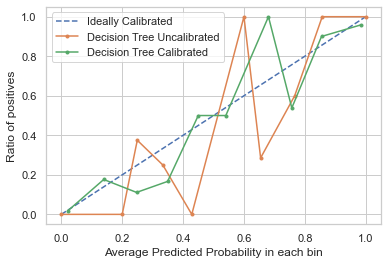

In [38]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.2, random_state=5)
calibrated = CalibratedClassifierCV(dt, method='sigmoid', cv=10)
calibrated.fit(xtrain, ytrain)
probs = calibrated.predict_proba(xtest)[:, 1]
uncalibrated = dt.predict_proba(xtest)[:,1]
fop_uncalibrated, mpv_uncalibrated = calibration_curve(ytest, uncalibrated, n_bins=10, normalize=True)
fop_calibrated, mpv_calibrated = calibration_curve(ytest, probs, n_bins=10, normalize=True)
plt.plot([0, 1], [0, 1], linestyle='--', label = 'Ideally Calibrated')
plt.plot(mpv_uncalibrated, fop_uncalibrated, marker='.', label = 'Decision Tree Uncalibrated')
plt.plot(mpv_calibrated, fop_calibrated, marker='.', label = 'Decision Tree Calibrated')
leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.show()

In [39]:
calibrated = CalibratedClassifierCV(dt, method='sigmoid', cv=10)
showResults(calibrated, "Decision Tree Cal", X, Y)

K-fold cross-validation results:
Decision Tree Cal  average accuracy is 0.863
Decision Tree Cal  average log_loss is 0.382
Decision Tree Cal  average brier score is 0.112
Decision Tree Cal  average auc is 0.912
Decision Tree Cal  average recall is 0.863
Decision Tree Cal  average precision is 0.858
Decision Tree Cal  average f1 is 0.857


In [30]:
knn = KNeighborsClassifier()

cv = GridSearchCV(knn,params_Knn,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [6, 8, 10, 12, 14, 16, 18, 20],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [31]:
display_results(cv)

Best parameters are: {'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}
Best Score is : 0.8167940876656473 


0.796 + or -0.103 for the {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
0.796 + or -0.119 for the {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}
0.777 + or -0.117 for the {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'uniform'}
0.786 + or -0.123 for the {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}
0.761 + or -0.105 for the {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
0.784 + or -0.111 for the {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
0.765 + or -0.114 for the {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'uniform'}
0.786 + or -0.109 for the {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'distance'}
0.762 + or -0.103 for the {'metric': 'euclidean', 'n_neighbors': 14, 'weights': 'uniform'}
0.79 + or -0.115 for the {'metric': 'euclidean', 'n_neigh

In [82]:
knn = KNeighborsClassifier(metric = 'manhattan',
                            n_neighbors = 6,
                            weights = 'distance')
knn.fit(X,Y)

showResults(knn, "KNN", X, Y)

K-fold cross-validation results:
KNN  average accuracy is 0.817
KNN  average log_loss is 1.405
KNN  average brier score is 0.139
KNN  average auc is 0.871
KNN  average recall is 0.860
KNN  average precision is 0.797
KNN  average f1 is 0.826
